In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset

In [153]:
data = pd.read_csv('breastcancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Data shape and info

In [154]:
data.shape

(569, 32)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [156]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Checking for Missing and Duplicate values

In [157]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [158]:
data.duplicated().sum()

np.int64(0)

Drop unnecessary Columns

In [159]:
data.drop(['id'],axis=1,inplace=True,errors='ignore')

Encode Diagnosis('Target Column')

In [160]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [161]:
data.columns = data.columns.str.replace(' ', '_')

Class Distribution Visualization

C:\Users\hamed\AppData\Local\Temp\ipykernel_25376\4249982639.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis',data=data,palette='Set2')


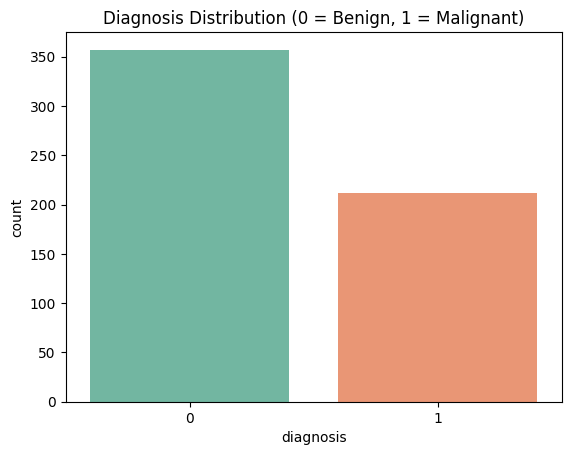

In [162]:
sns.countplot(x='diagnosis',data=data,palette='Set2')
plt.title('Diagnosis Distribution (0 = Benign, 1 = Malignant)')
plt.show()

Descripitive Statistics

In [163]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


Correlation Heatmap

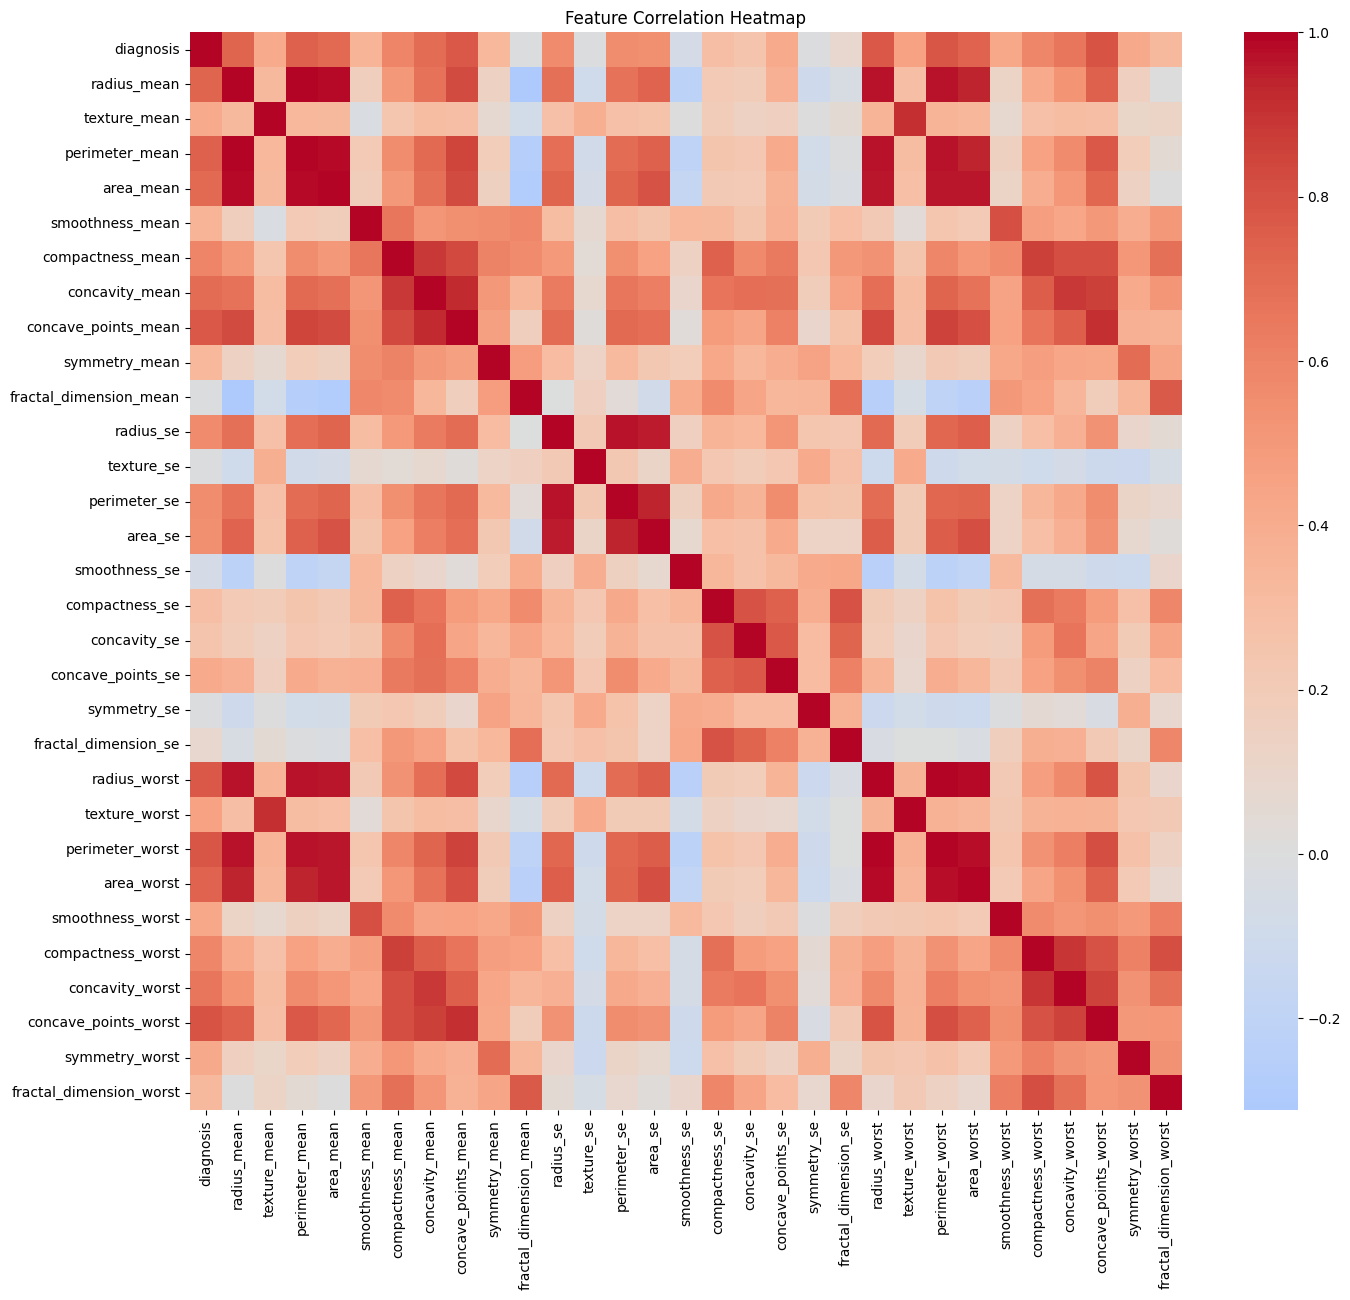

In [164]:
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(),cmap='coolwarm',center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

FEATURE ENGINEERING + PREPROCESSING

In [165]:
selected_features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean']
X = data[selected_features]
y = data['diagnosis']

Checking the Skewness

In [166]:
skewed_features = X.skew().sort_values(ascending=False)
skewed_features

area_mean                 1.645732
concavity_mean            1.401180
fractal_dimension_mean    1.304489
compactness_mean          1.190123
concave_points_mean       1.171180
perimeter_mean            0.990650
radius_mean               0.942380
symmetry_mean             0.725609
texture_mean              0.650450
smoothness_mean           0.456324
dtype: float64

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline


Train Test and Split

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [169]:
log_transformer = FunctionTransformer(np.log1p,validate=True)
proprocessor = ColumnTransformer([
    ('tnf1', make_pipeline(log_transformer,StandardScaler()), selected_features)
])

Model Building + Pipeline + Hyperparameter

Pipeline and Model

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor',proprocessor),
    ('classifier',LogisticRegression(max_iter=1000))
])

Hyperparamter Grid

In [171]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__penalty':['l1','l2'],
    'classifier__C':[0.01,0.1,1,10],
    'classifier__solver':['liblinear']
}

grid = GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [172]:
grid.fit(X_train,y_train)

,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('tnf1', ...)]"


Evaluate the Model

In [173]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = grid.predict(X_test)
grid.best_params_
print(accuracy_score(y_train,grid.predict(X_train)))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9406593406593406
0.9385964912280702
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        72
           1       0.89      0.95      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



Visualizations

Confusion Matrix

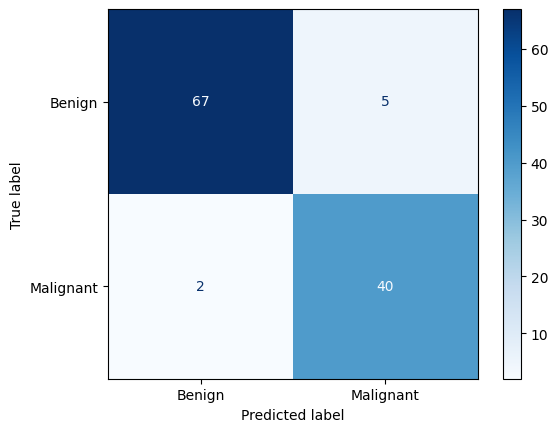

In [174]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Benign','Malignant']).plot(cmap='Blues')

ROC Curve

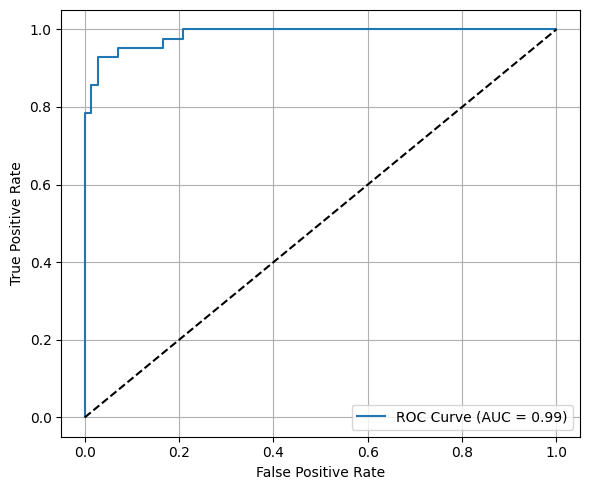

In [175]:
from sklearn.metrics import roc_curve,roc_auc_score
y_proba = grid.predict_proba(X_test)[:,1]

fpr,tpr,threshold = roc_curve(y_test,y_proba)
auc_score = roc_auc_score(y_test,y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sigmoid Curve

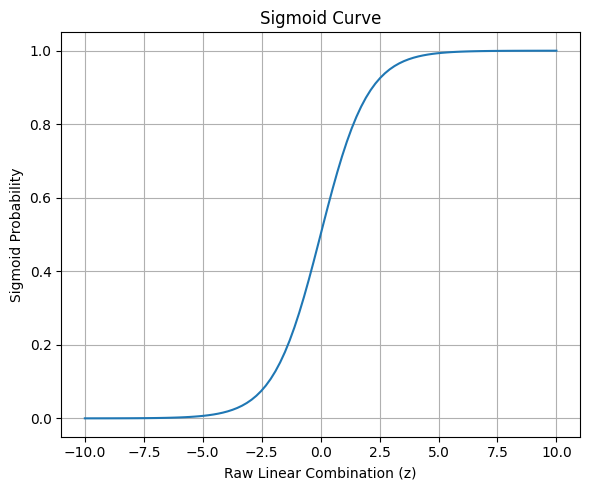

In [176]:
z = np.linspace(-10,10,100)
sigmoid = 1/(1+np.exp(-z))

plt.figure(figsize=(6,5))
plt.plot(z,sigmoid)
plt.xlabel('Raw Linear Combination (z)')
plt.ylabel('Sigmoid Probability')
plt.title('Sigmoid Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

Export the Model using Pickle

In [177]:
import pickle

with open('breast_cancer_model.pkl','wb') as f:
    pickle.dump(grid.best_estimator_,f)

In [178]:
# new_data = pd.DataFrame([{
#     'radius_mean': 12.0,
#     'texture_mean': 14.0,
#     'perimeter_mean': 78.0,
#     'area_mean': 450.0,
#     'smoothness_mean': 0.08,
#     'compactness_mean': 0.07,
#     'concavity_mean': 0.04,
#     'concave_points_mean': 0.03,
#     'symmetry_mean': 0.18,
#     'fractal_dimension_mean': 0.06
# }])

# pred = grid.best_estimator_.predict(new_data)[0]
# proba = grid.best_estimator_.predict_proba(new_data)[0][1]

# print("🔍 Prediction:", pred)
# print("📊 Probability:", proba)
